$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+2$$

The **global minimum** of this function is $f(0,0) = 0$. To avoid local mininma, we do the following:

In [11]:
# import the autoreload functionality
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from q3 import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


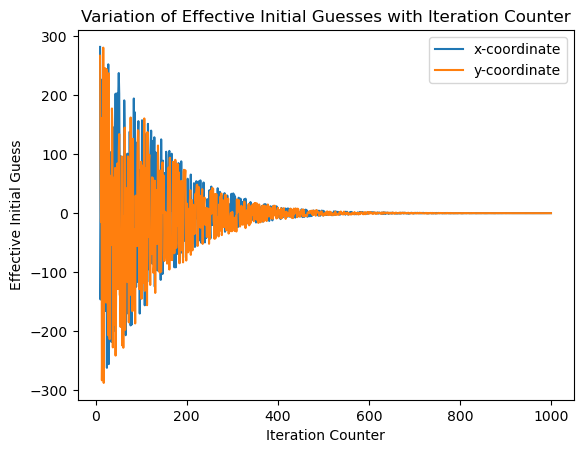

True


In [12]:
bounds = [-600, 600]  # Bounds for x1 and x2
tolerance = 1e-8  # Tolerance for convergence
warmup_iterations_list = [10, 100] 
warmup_iterations = 10  # Number of warm-up iterations
max_iterations = 1000  # Maximum number of iterations

result, initial_guesses, best_iteration= refined_global_optimizer(bounds, tolerance, warmup_iterations, max_iterations)

x_values = [guess[0] for guess in initial_guesses]  # Extract the x-coordinate from each initial guess
y_values = [guess[1] for guess in initial_guesses]  # Extract the y-coordinate from each initial guess

plt.plot(range(warmup_iterations, max_iterations), x_values, label='x-coordinate')
plt.plot(range(warmup_iterations, max_iterations), y_values, label='y-coordinate')
plt.xlabel('Iteration Counter')
plt.ylabel('Effective Initial Guess')
plt.title('Variation of Effective Initial Guesses with Iteration Counter')
plt.legend()
plt.show()

x, y = result
print(math.isclose(x, 0, abs_tol= 0.00005))


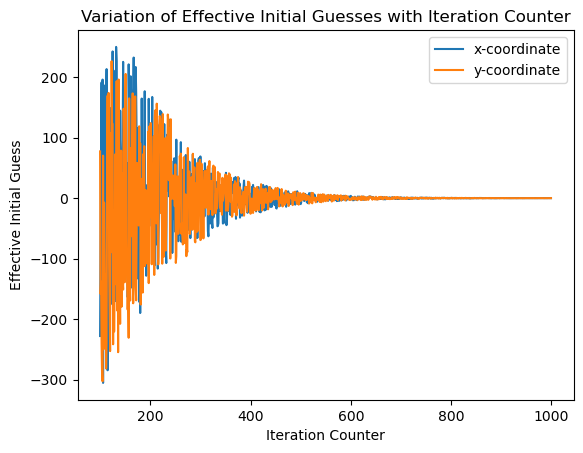

In [13]:
warmup_iterations_100 = 100

result_100, initial_guesses_100, best_iteration_100 = refined_global_optimizer(bounds, tolerance, warmup_iterations_100, max_iterations)

x_values_100 = [guess[0] for guess in initial_guesses_100]  # Extract the x-coordinate from each initial guess
y_values_100 = [guess[1] for guess in initial_guesses_100]  # Extract the y-coordinate from each initial guess

plt.plot(range(warmup_iterations_100, max_iterations), x_values_100, label='x-coordinate')
plt.plot(range(warmup_iterations_100, max_iterations), y_values_100, label='y-coordinate')
plt.xlabel('Iteration Counter')
plt.ylabel('Effective Initial Guess')
plt.title('Variation of Effective Initial Guesses with Iteration Counter')
plt.legend()
plt.show()

To compare better, we compute the average of 100 tries

In [14]:
tries = 100
all_best_iterations = []
all_best_iterations_100 = []
for i in range(tries):
    result, initial_guesses, best_iteration= refined_global_optimizer(bounds, tolerance, warmup_iterations, max_iterations)
    result_100, initial_guesses_100, best_iteration_100 = refined_global_optimizer(bounds, tolerance, warmup_iterations_100, max_iterations)
    #List with all iterations
    all_best_iterations.append(best_iteration)
    all_best_iterations_100.append(best_iteration_100)

In [15]:
#Average with all iterations, including warm up
print(average_list(all_best_iterations))
print(average_list(all_best_iterations_100))
#Average with all iterations, not including warm up
print(average_list(all_best_iterations) - warmup_iterations)
print(average_list(all_best_iterations_100) - warmup_iterations_100)

365.08
447.79
355.08
347.79


By setting K_ to a 100, we increase tenfold the amount of war-up iterations. However, since during these iterations there are no adjustments, they do not improve the speed at which it converges. 

The thing that is keeping us on edge is the fact that, even if when K_ = 100 it, as far as we have been able to observe, always takes more iterations to converge, if we only take into account the iterations after the warm-up, it is not as clear.

To try to decide if it makes a significant difference, the optimization has been done 100 times with both, 10 and 100 warm-up iterations and the mean has been computed. If we were to take all iterations into account, again, K_= 100 is substantially slower. However, the after warm-up iterations show a different picture, with K_ = 100 being faster.
To conduct this test, we have not set any any seed, which means that results can not be exactly replicated. In this case the results are the following:

All iterations (including warm-up)

·Warm-up(10) = 365.08 iterations

·Warm-up(100) = 447.79 iterations

All iterations (no including warm-up)

·Warm-up(10) = 355.08 iterations

·Warm-up(100) = 347.79 iterations
